In [1]:
pip install mglearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mglearn
from sklearn import linear_model
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_theme();


# Change default colormap
plt.rcParams["image.cmap"] = "Set2"
sns.set_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [3]:
eu_Data = pd.read_csv("2020_EU_Data.csv")
eu_Data.head()

,Year,Value,Land
0,2020,141667,55030
1,2020,68827,55030
2,2020,1051,113430
3,2020,34,113430
4,2020,5,40735


**Pearson Correlation (positive or negative correlation greater than abs(0.5))

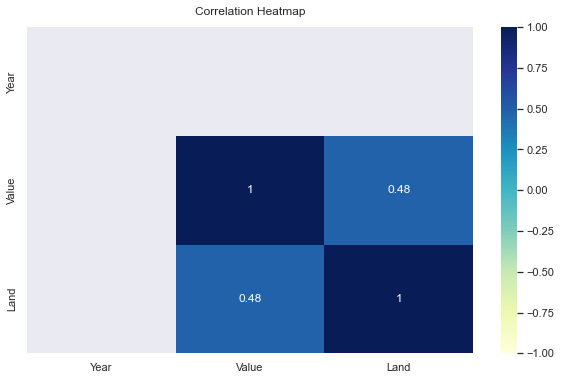

In [6]:
data = eu_Data
# Increase the size of the heatmap.
plt.figure(figsize=(10, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(method='pearson'), vmin=-1, vmax=1, annot=True,  cmap="YlGnBu")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [8]:
cor = eu_Data.corr()
cor

,Year,Value,Land
Year,NaN,NaN,NaN
Value,NaN,1.000000,0.481733
Land,NaN,0.481733,1.000000


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
X = eu_Data['Value']
y = eu_Data['Year']
eu_Data = eu_Data.dropna()

In [18]:
# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1.77000e+02 5.00000e+00 1.05100e+03 2.91373e+05 9.75500e+04 3.63075e+05
 1.86050e+04 7.56000e+02 3.40000e+01 1.41667e+05 8.00000e+00 1.00000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.